<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Customer Segmentation</p>
<br />

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

author: Muhammad Shafa Praramadhana

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Libraries</p>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [72]:
# Import the dataset
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [73]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">About The Dataset</p>

<br />

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Exploratory Data Analysis</p>

In [74]:
df.shape

(2240, 29)

In [75]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [76]:
# Information about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [77]:
# Check total null value on every column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [78]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**From the above cells, we know that:**


*   There are 24 missing values in the Income column
* Z_ConstContact and Z_revenue values are the same in every rows, so those variable doesnt contribute anything and i will drop them later
*   Dt_Customer column that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features, so we need to encode it later

First, we will deal with the missing values in the Income column by dropping rows that are contain missing values



In [79]:
# Remove the null values
df = df.dropna()
print('Total data points after removing the rows with missing values are: ', len(df))

Total data points after removing the rows with missing values are:  2216


Now i am going to create a feature out of Dt_Customer column that indicates the number of days a customer is registered in the database by taking this value relative to the most recent customer in the record

In [80]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = 'mixed')
dates = []

for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

newest = max(dates)
oldest = min(dates)

print("The newest customer's enrolment date: ", newest)
print("The oldest customer's enrolment date: ", oldest)

The newest customer's enrolment date:  2014-12-06
The oldest customer's enrolment date:  2012-01-08


<ipython-input-80-b0f1b9b2e48c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = 'mixed')


In [81]:
# Creating Customer_For column
# The number of days the customer start shopping relative to the newest recorded customer
days = []

for i in dates:
  delta = newest - i
  days.append(delta)

df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors = 'coerce') # invalid parsing will be set to NaN

In [82]:
# Exploring the unique values
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [83]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

We will do this steps for feature engineering:


*   Extract the Age of a customer by the Year_Birth column that indicates the birth year of a person
*   Create a Spent column indicates the total amount spent by the customer in various categories
* Create a Living_With out of Marital_Status
* Create Children column to indicate total children in a household, kids and teenagers
* Create Family_Size column
* Create an Is_Parent column to indicate parenthood status
* After creating 3 categories in the Education column, we will drop some of the redundant columns



In [84]:
# Feature engineering
# Age of customer today
df['Age'] = 2024 - df['Year_Birth']

# Sum of spent on various products
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Living situation by Marital_Status
df['Living_With'] = df['Marital_Status'].replace({'Married': 'Partner',
                                                  'Together': 'Partner',
                                                  'Single': 'Alone',
                                                  'Divorced': 'Alone',
                                                  'Widow': 'Alone',
                                                  'Alone': 'Alone',
                                                  'Absurd': 'Alone',
                                                  'YOLO': 'Alone'})

# Total children in the house
df['Children'] = df['Kidhome'] + df['Teenhome']

# The size of the family base on Living_With and Children column
df['Family_Size'] = df['Living_With'].replace({'Partner': 2, 'Alone': 1}) + df['Children']

# Parential status
df['Is_Parent'] = np.where(df['Children'] > 0, 1, 0)

# Education levels in three groups
df['Education'] = df['Education'].replace({'Graduation': 'Graduate',
                                           'PhD': 'Postgraduate',
                                           'Master': 'Postgraduate',
                                           '2n Cycle': 'Undergraduate',
                                           'Basic': 'Undergraduate'})

# Rename columns for simplicity
df = df.rename(columns = {'MntWines': 'Wines',
                          'MntFruits': 'Fruits',
                          'MntMeatProducts': 'Meat',
                          'MntFishProducts': 'Fish',
                          'MntSweetProducts': 'Sweets',
                          'MntGoldProds': 'Gold'})

# Columns to drop
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']

# Drop columns
df = df.drop(columns = to_drop, axis = 1)

In [85]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,43,422,Partner,1,3,1


In [86]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,131.000000,2525.000000,3.000000,5.000000,1.000000




*   The above stats show some disparity between mean Income and Age and max Income and Age
*   The max-age is 131 years, as i calculated per 2024
* Lets plot some selected columns



<Figure size 500x500 with 0 Axes>

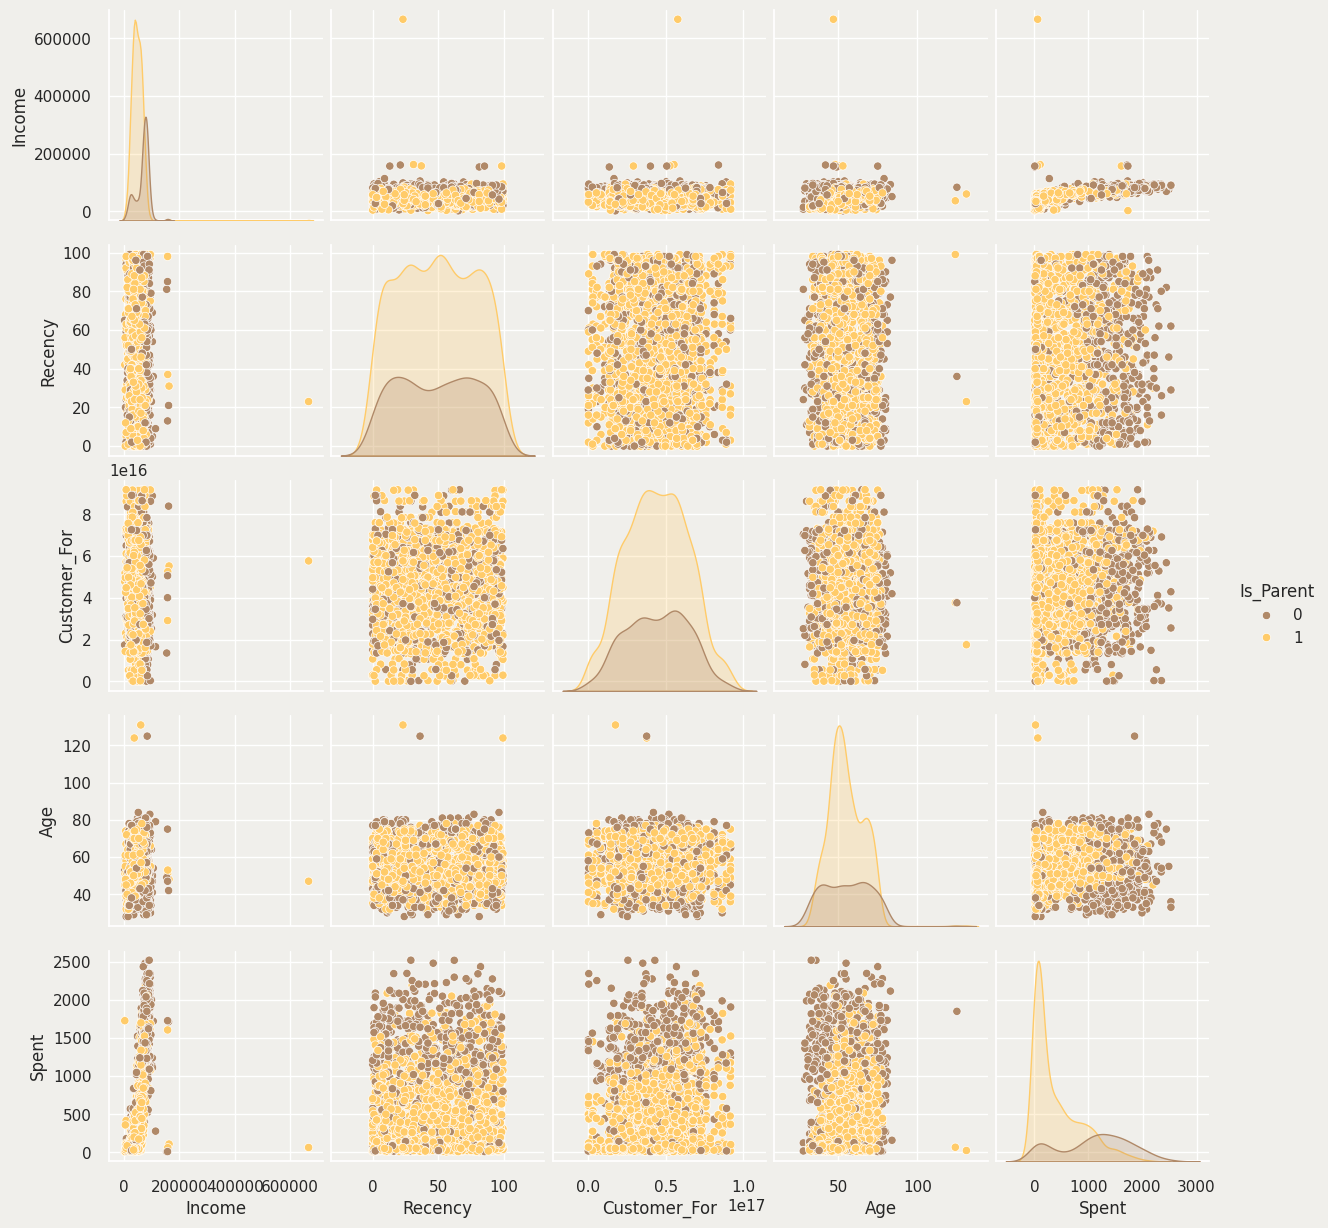

In [87]:
# Plot some selected features
# Import seaborn
import seaborn as sns

# Setting up some preferenced colors
sns.set(rc = {'axes.facecolor': '#f0efeb', 'figure.facecolor': '#f0efeb', 'figure.figsize':(5, 5)})
pallet = ['#cb997e', '#a5a58d', '#ffcb690', '#adc178', '#d5d0cd', '#fcb97d']

to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']

plt.figure()
sns.pairplot(df[to_plot], hue = 'Is_Parent', palette = ['#b08968', '#ffcb69'])

plt.show()

Clearly theres outlier in the Income and Age column

In [88]:
# Delete outliers
df = df[(df['Income'] < 600000)]
df = df[(df['Age'] < 90)]

print('Total data points after removing the outliers: ', len(df))

Total data points after removing the outliers:  2212


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

**Im gonna apply these following steps for data preprocessing:**


*   Label encoding the categorical variables
*   Standard scaling
* Dimensionality reduction



In [89]:
# List of categorical variables
obj = (df.dtypes == 'object')
categorical = list(obj[obj].index)

print('List of categorical variables: ', categorical)

List of categorical variables:  ['Education', 'Living_With']


In [90]:
# Label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in categorical:
  df[i] = encoder.fit_transform(df[i])

In [91]:
# Make the copy of the data
from sklearn.preprocessing import StandardScaler

ds = df.copy()
to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

ds = ds.drop(to_drop, axis = 1)

scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns = ds.columns)

Now the dataframe has been encode and scaled. This is the dataframe to be used for further modelling:

In [92]:
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Dimensionality Reduction</p>

<br />

**These are the steps i will perform in this section:**

* Dimensionality reduction with PCA
* Plotting the dataframe



**Principal component analysis (PCA)** is a dimensionality reduction used to simplify a large dataset into a smaller set while still maintaining significant patterns and trends

<br />



In [93]:
# Apply PCA to reduce dimensions to 3
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
ds = pd.DataFrame(pca.fit_transform(ds), columns = ['col1', 'col2', 'col3'])

In [94]:
ds.head()

,col1,col2,col3
0,4.994354,-0.151036,2.646917
1,-2.884457,-0.006733,-1.863647
2,2.617861,-0.720968,-0.258473
3,-2.676039,-1.542125,-0.924117
4,-0.649587,0.209984,-0.018459


In [95]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,4.497106e-17,2.878377,-5.969415,-2.538493,-0.780416,2.383290,7.444286
col2,2212.0,1.284887e-17,1.706839,-4.312280,-1.328215,-0.158641,1.242279,6.142491
col3,2212.0,4.657717e-17,1.221949,-3.531369,-0.826643,-0.020314,0.801710,6.616214


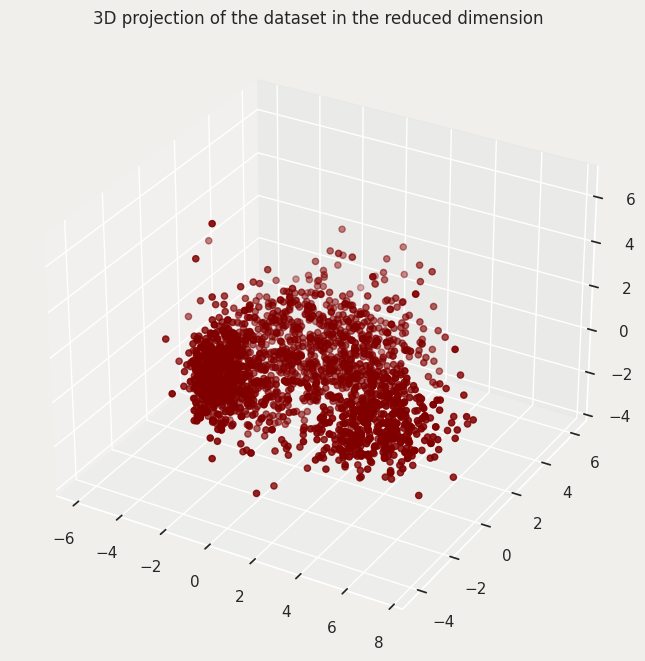

In [96]:
# 3D projection of dataset in the reduced dimension

x = ds['col1']
y = ds['col2']
z = ds['col3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = 'maroon')
ax.set_title('3D projection of the dataset in the reduced dimension')

plt.show()

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Modelling</p>
<br />

**These are the steps i will perform in the clustering section:**
* Elbow method to determine the optimal number of clusters
* Clustering with Agglomerative clustering
* Examining the clusters formed


Now i will be performing clustering with Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

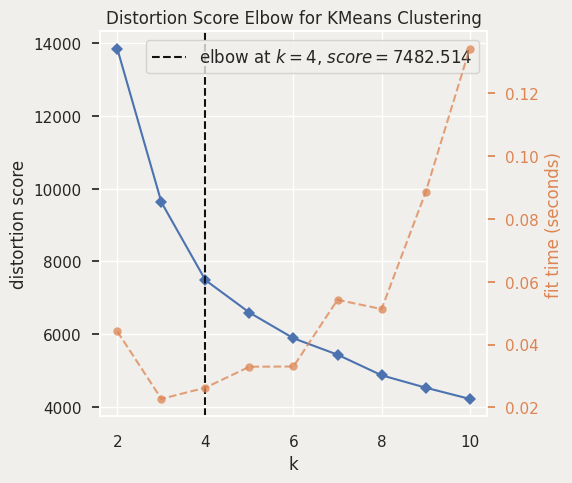

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
# Elbow method
# Import kmeans and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

elbow_method = KElbowVisualizer(KMeans(), k = 10)
elbow_method.fit(ds)
elbow_method.show()

The elbow method shows that 4 will be the optimal number of clusters. Now i will be fitting the Agglomerative model to get the final clusters.

In [98]:
# Modelling
# Import Agglomerative cluster from sklearn
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 4)
y_hat = model.fit_predict(ds)

ds['Clusters'] = y_hat
df['Clusters'] = y_hat

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Model Evaluation</p>
<br />

Now lets have a look at the 3D distribution of the clusters

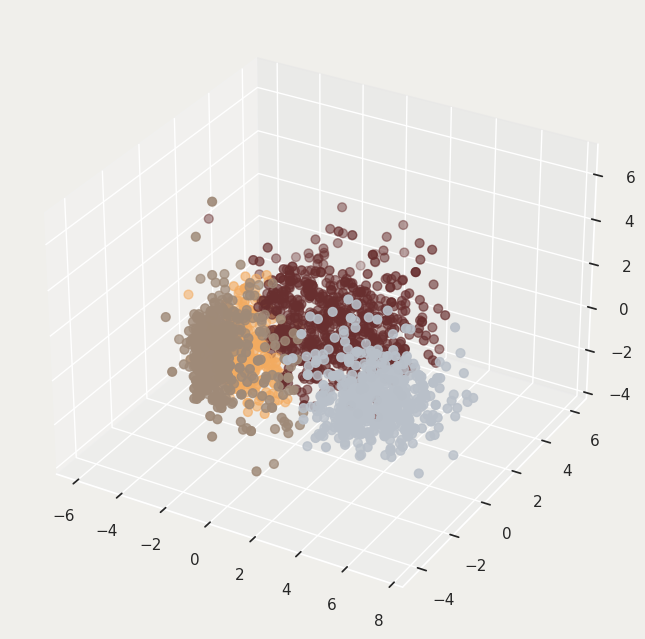

In [99]:
from matplotlib import colors

fig = plt.figure(figsize = (10, 8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s = 40, c = ds['Clusters'], marker = 'o', cmap = colors.ListedColormap(["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]))

<p style="font-family:robotto;color:#ff0000;font-size:150%;text-align:left;border-radius:6px 6px;font-weight:bold;">NOTE: EVERY TIME YOU RUN THIS CODE, YOU WILL LIKELY GET A SET OF GROUP IN A DIFFERENT CLUSTER</p>

Since this is an unsupervised learning, we don't have a label to evalute or scoring our model. The purpose of clustering is to study the patterns in the clusters formed and determine the nature of the clusters patterns.
<br /> <br />
**Now, let's look at the group distribution of clustering**

<ipython-input-100-8571bca1a4fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x = df['Clusters'], palette = pal)


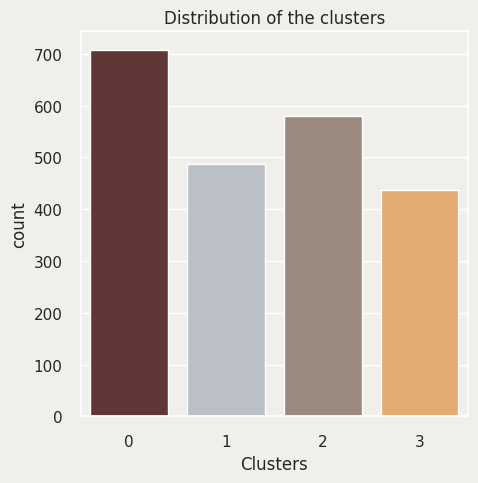

In [100]:
# Plotting countplot
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x = df['Clusters'], palette = pal)
pl.set_title('Distribution of the clusters')
plt.show()

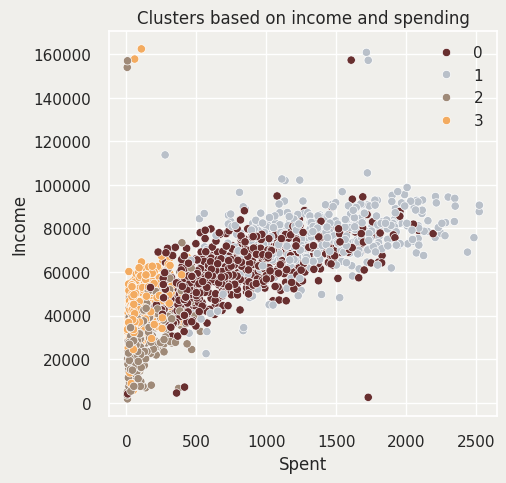

In [101]:
# Scatter plot to see how clustering based on the Income and Spent variables
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters'], palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
pl.set_title('Clusters based on income and spending')
plt.legend()

plt.show()

**Income vs Spending plot shows the clusters pattern:**

* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income
* group 3: high spending & low income

<br />
<br />

Lets explore how did our campaign do in the past

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-102-f44d865e9bf1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

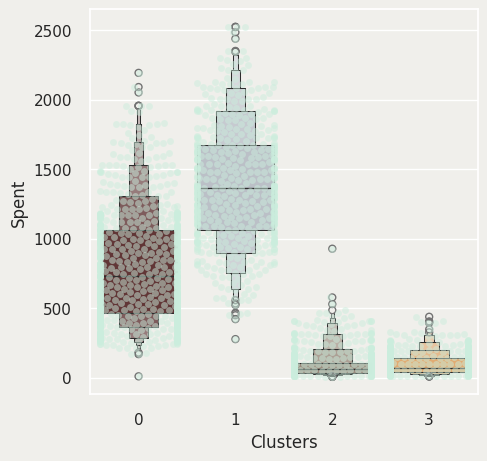

In [102]:
plt.figure()
pl = sns.swarmplot(x = df['Clusters'], y = df['Spent'], color = '#CBEDDD', alpha = 0.5)
pl = sns.boxenplot(x = df['Clusters'], y = df['Spent'], palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
plt.show()

From the above plot, we can see that cluster 1 is our biggest set of customers

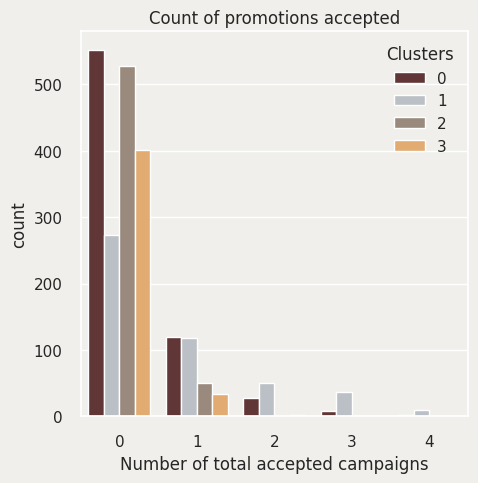

In [103]:
# Creating new column to get sum of the accepted campaign
df['Total_Campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

plt.figure()
pl = sns.countplot(x = df['Total_Campaigns'], hue = df['Clusters'], palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
pl.set_title('Count of promotions accepted')
pl.set_xlabel('Number of total accepted campaigns')
plt.show()

There has not been an overwhelming reponse to the campaigns so far. Very few participants overall. Perhaps better-targeted and well planned campaigns are required to boost sales

<ipython-input-104-fdba953b63c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(x = df['Clusters'], y = df['NumDealsPurchases'], palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])


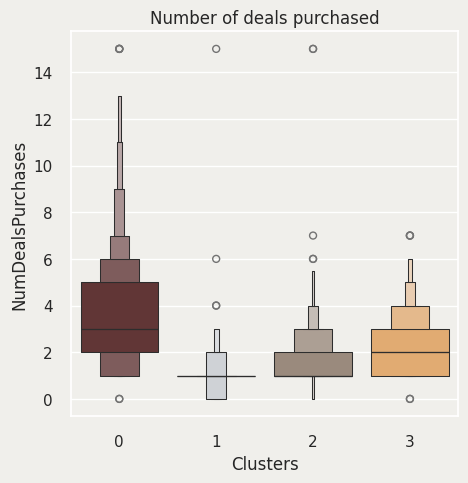

In [104]:
plt.figure()
pl = sns.boxenplot(x = df['Clusters'], y = df['NumDealsPurchases'], palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
pl.set_title('Number of deals purchased')
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and 3.

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Clusters Profiling</p>
<br />

Now that we have formed the clusters and looked at their purchasing habits. We will be profiling the clusters formed and come to the conclusion about who is our star customer and who needs more attention from the store.



<Figure size 500x500 with 0 Axes>

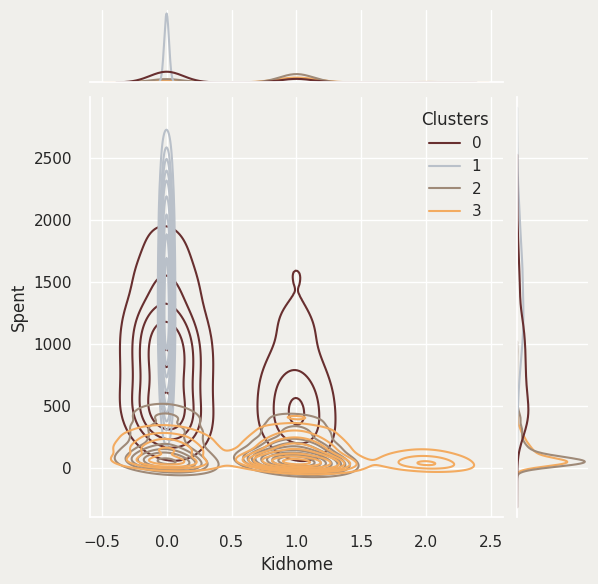

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 500x500 with 0 Axes>

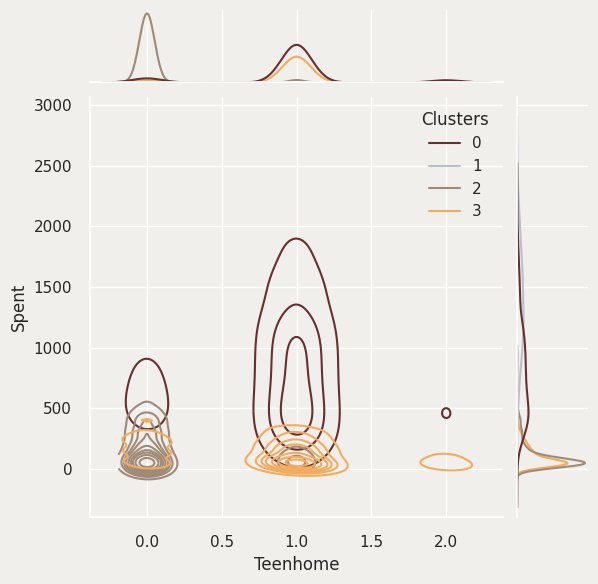

<Figure size 500x500 with 0 Axes>

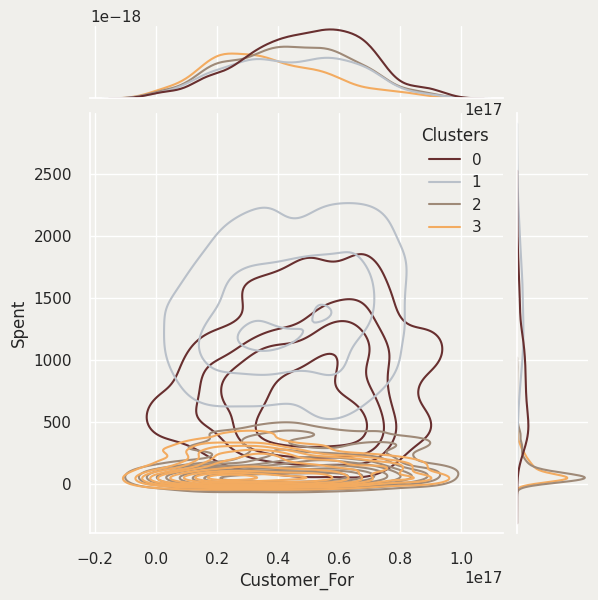

<Figure size 500x500 with 0 Axes>

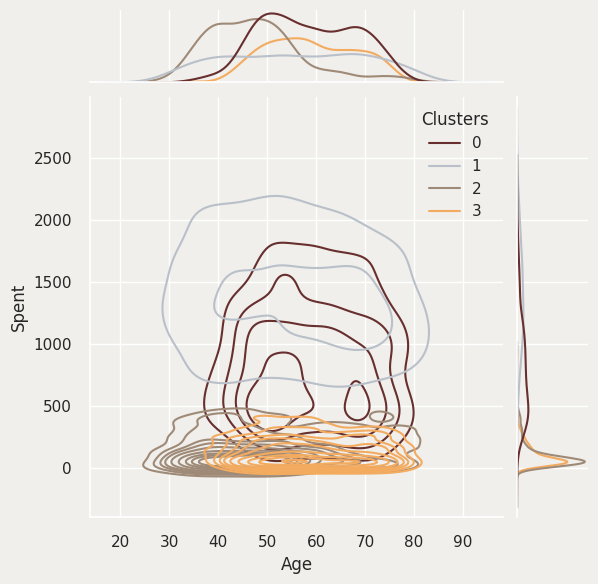

<Figure size 500x500 with 0 Axes>

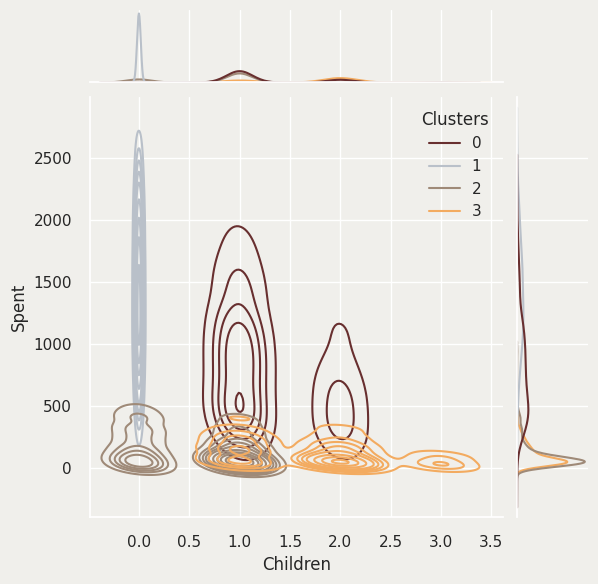

<Figure size 500x500 with 0 Axes>

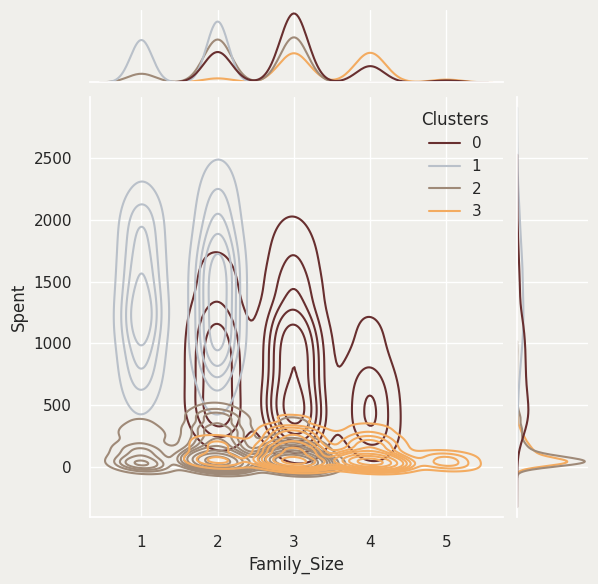

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 500x500 with 0 Axes>

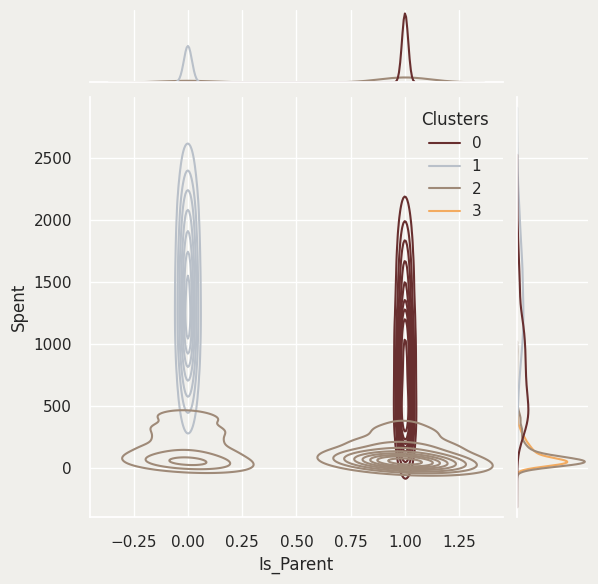

<Figure size 500x500 with 0 Axes>

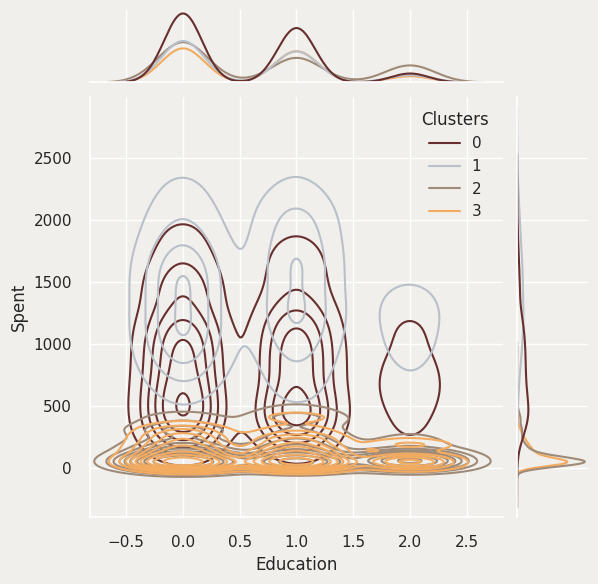

<Figure size 500x500 with 0 Axes>

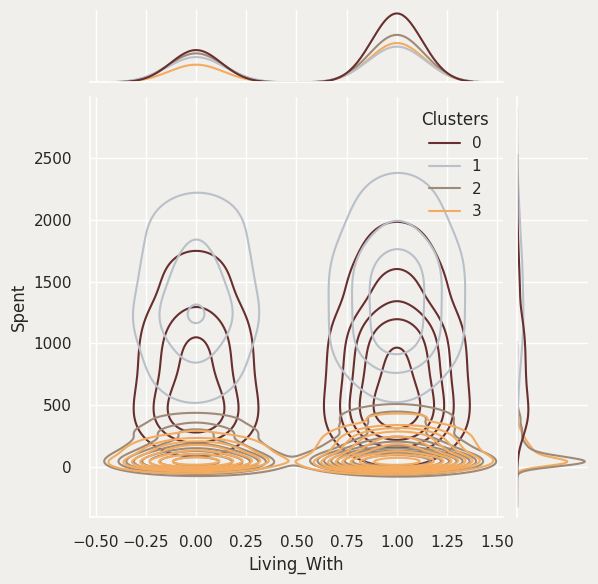

In [105]:
personal = ['Kidhome', 'Teenhome', 'Customer_For', 'Age', 'Children', 'Family_Size',
            'Is_Parent', 'Education', 'Living_With']

for i in personal:
  plt.figure()
  sns.jointplot(x = df[i], y = df['Spent'], hue = df['Clusters'], kind = 'kde',
                palette = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])
  plt.show()

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Profiling Conclusion</p>
<br />

**Cluster 0:**
* They are definitely parent
* Some of them are single parent
* With minimum family size of 2 and maximum of 4
* They have children, most of the are teenager

<br />

**Cluster 1:**
* Definitely not parent
* Majority of this cluster live with their partner
* Their age range from 25-85
* Came from high income group

<br />

**Cluster 2:**
* The majority of this cluster are parent
* Max of 3 member in the family
* Most of them have kid at home (not teenager)
* Relatively younger
* Came from high income group


<br />

**Cluster 3:**
* They are parent
* Maximum family member of 5 and minimum of 2
* Most of them have 2 children with majority of kid
* Majority of them are older
* Came from a low income group

